# Iconic Project 2024

### Notebook by  : Rahardi Salim, Vincent Davis Leonard Tjoeng, Christian Yudistira Hermawan
### [University of Indonesia](https://www.ui.ac.id/)

## Table of contents

1. Introduction

2. License

3. Required libraries

4. The problem domain

6. Step 1: Checking the data

7. Step 2: Tidying the data

8. Step 3: Exploratory analysis

9. Step 4: Feature Engineering

10. Step 5: Modeling

10. Step 6: Reproducibility (Feature Importance)

11. Conclusions

---
The next section explains the dataset and problem context used in this personal project.


## 1. Introductions

Welcome to this notebook, created for the the project project. In this project, we are tasked with analyzing and predicting mental health conditions based on responses to a series of questions. The dataset includes various indicators of mental well-being and aims to identify specific mental health conditions.

The columns in our dataset are:

- **User_ID**: Unique identifier for each respondent.
- **How have you been feeling lately?**
- **Have you been sleeping well?**
- **Do you find it hard to concentrate?**
- **Have you lost interest in activities you used to enjoy?**
- **Do you feel tired or fatigued most of the time?**
- **Do you feel nervous, anxious, or on edge frequently?**
- **Have you experienced sudden panic attacks?**
- **Do you avoid social situations or activities you used to enjoy?**
- **Have you experienced flashbacks or nightmares about a traumatic event?**
- **Do you feel detached from reality or your surroundings?**
- **Mental Health Condition**: The diagnosed mental health condition.
- **Have you experienced sudden panic attacks? Do you avoid social situations or activities**: (Note: This column appears to be a concatenation error and contains no valid data).

### Objectives

The primary objectives of this notebook are:
1. To explore the data, understand its structure, and clean it as necessary.
2. To analyze the distribution of responses for each question.
3. To correlate the responses with the diagnosed mental health conditions.
4. To draw insights and conclusions that can help in predicting mental health conditions based on the given responses.

### Analysis Approach

1. **Data Cleaning**: We will remove the column with the concatenation error and handle any missing values appropriately.
2. **Data Exploration**: We will perform exploratory data analysis (EDA) to understand the distribution of responses and identify any patterns.
3. **Data Visualization**: Visual tools will be used to illustrate the relationships between responses and mental health conditions.
4. **Conclusion Drawing**: Based on the analysis, we will draw conclusions about common symptoms associated with each mental health condition and how different questions correlate with these conditions.

By the end of this notebook, we aim to have a comprehensive understanding of the data and clear insights that can be used for predictive modeling in the context of mental health.

---
The next section explains the dataset and problem context used in this personal project.


## 2. Import Necessary Libraries

To begin, we need to import the essential libraries required for data manipulation, analysis, and visualization. These libraries provide the tools and functions we need to effectively work with our dataset.

---
After understanding the data, the following section focuses on data preparation and modeling steps.


In [2]:
!pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 50.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.12.1 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.25.2 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have s

In [3]:
from ydata_profiling import ProfileReport

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
from geopy.geocoders import GoogleV3
import time
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, 
                              GradientBoostingRegressor, ExtraTreesRegressor)
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor

## 3. Data Overview

Here is a brief overview of the data:

- **Total Entries**: 5000
- **Number of Features**: 12 (excluding the concatenation error column)
- **Missing Values**: Minimal, with a few null values in some columns.
- **Mental Health Conditions**: 9 distinct categories

In [4]:
# Loading the datasets
df = pd.read_csv('/kaggle/input/iconicdataset-rahardisalim/Kesehatan/Kesehatan.csv')

In [5]:
df.head()

,User_ID,How have you been feeling lately?,Have you been sleeping well?,Do you find it hard to concentrate?,Have you lost interest in activities you used to enjoy?,Do you feel tired or fatigued most of the time?,"Do you feel nervous, anxious, or on edge frequently?",Have you experienced sudden panic attacks?,Do you avoid social situations or activities you used to enjoy?,Have you experienced flashbacks or nightmares about a traumatic event?,Do you feel detached from reality or your surroundings?,Mental Health Condition,Have you experienced sudden panic attacks?\tDo you avoid social situations or activities
0,4,I've been feeling really down and empty lately,Not really. I've been having trouble falling a...,"Yeah, I can't focus on anything for long","Sometimes, I find it hard to stay interested i...","Yeah, I feel exhausted all the time, even afte...","Not really, but I do feel kind of on edge when...","No, I haven't had panic attacks. My mood swing...","Not really, I enjoy being around people, but s...","No, I haven't had any flashbacks or nightmares","No, I feel pretty grounded, but sometimes I ge...",ADHD,NaN
1,9,"I've been feeling okay, but I've been struggli...","Not really, I have trouble falling asleep and ...",NaN,"Sometimes, I find it hard to stay interested i...","Yes, I often feel exhausted from the emotional...","Not really, I don't feel anxious, just restless","No, I haven't had panic attacks. My mood swing...","Not really, I enjoy being around people, but s...","es, I often have intense emotional reactions t...","Sometimes, especially when I've been using. It...",ADHD,NaN
2,8,"I've been feeling okay, but I've been struggli...","No, I've been having trouble sleeping. I eithe...","Yes, I find it very hard to concentrate, espec...","Sometimes, I find it hard to stay interested i...","Yes, I often feel exhausted from the emotional...","Not really, I don't feel anxious, just restless","No, I haven't had panic attacks","Not really, I enjoy being around people, but s...","No, I haven't had flashbacks or nightmares","Sometimes, it's like I'm going through the mot...",Bipolar Disorder,NaN
3,3,I've been feeling really anxious and on edge l...,"No, I've been having trouble falling asleep an...","Yes, it's really hard to focus when my emotion...","During my low periods, I have no interest in a...","Yes, I often feel exhausted from the emotional...","Not really, I don't feel anxious, just restless","Yes, sometimes I have sudden episodes of inten...",Definitely. I avoid a lot of places and people...,"No, I haven't had flashbacks or nightmares","Yes, often I feel like I'm living in a differe...",Bipolar Disorder,NaN
4,5,"I've been feeling okay, but I've been struggli...",I've been sleeping very little lately. During ...,NaN,"Yeah, I used to love going out with friends an...","Yes, I feel exhausted all the time.",Definitely. I feel like I'm always on the verg...,"Yes, sometimes I have sudden episodes of inten...","Yes, I tend to avoid social situations because...","No, I haven't had any flashbacks or nightmares","No, I feel pretty grounded, but sometimes I ge...",Anxiety,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   User_ID                                                                                  5000 non-null   int64  
 1   How have you been feeling lately?                                                        5000 non-null   object 
 2   Have you been sleeping well?                                                             5000 non-null   object 
 3   Do you find it hard to concentrate?                                                      4997 non-null   object 
 4   Have you lost interest in activities you used to enjoy?                                  5000 non-null   object 
 5   Do you feel tired or fatigued most of the time?               

In [7]:
df.nunique()

User_ID                                                                                     9
How have you been feeling lately?                                                           9
Have you been sleeping well?                                                                9
Do you find it hard to concentrate?                                                         9
Have you lost interest in activities you used to enjoy?                                     9
Do you feel tired or fatigued most of the time?                                             9
 Do you feel nervous, anxious, or on edge frequently?                                       9
Have you experienced sudden panic attacks?                                                  9
Do you avoid social situations or activities you used to enjoy?                             9
Have you experienced flashbacks or nightmares about a traumatic event?                      8
Do you feel detached from reality or your surroundings?     

## 4. Data Cleaning

In this step, we will clean the dataset by removing unnecessary columns and handling missing values appropriately.

---
After understanding the data, the following section focuses on data preparation and modeling steps.


In [8]:
df = df.drop(columns=['Have you experienced sudden panic attacks?\tDo you avoid social situations or activities'])
df = df.dropna()

**Explanation:**

1. **Dropping an Invalid Column**:
   - We drop the column `'Have you experienced sudden panic attacks?\tDo you avoid social situations or activities'` because it contains only null values and appears to be a concatenation error.


2. **Handling Missing Values**:
   - We drop rows with missing values using `df.dropna()`. This decision is made because:
     - The dataset contains only a small number of missing values.
     - Random imputation could introduce biases, especially in medical and psychological data where accuracy is crucial.
     - Ensuring the integrity of the data is paramount for reliable analysis and predictions.
     
     
3. **Handling Duplicates**:
   - For the purpose of EDA, we will ignore duplicate entries to understand how many people provided the same responses. This can give us insights into common patterns and trends in the data.

---
After understanding the data, the following section focuses on data preparation and modeling steps.


## 5. Exploratory Data Analysis (EDA)

In this section, we will perform Exploratory Data Analysis (EDA) to gain insights into our dataset. EDA involves summarizing the main characteristics of the data and visualizing patterns, trends, and relationships among the variables. This helps in understanding the distribution of data and identifying any anomalies or interesting observations.

---
After understanding the data, the following section focuses on data preparation and modeling steps.


#### 5.1 Profiling View

The profiling view provides an overview of the dataset, including the data types, missing values, and summary statistics for each column. This initial examination helps in understanding the structure and quality of the data.

---
After understanding the data, the following section focuses on data preparation and modeling steps.


In [ ]:
profile_train = ProfileReport(df, title = "Data Insight")
profile_train.to_notebook_iframe()

#### 5.2 Mental Health Condition Overview

We will start by examining the distribution of different mental health conditions in our dataset. Understanding the prevalence of each condition can provide context for the subsequent analysis.

---
After understanding the data, the following section focuses on data preparation and modeling steps.


In [9]:
label_counts = df['Mental Health Condition'].value_counts()
print(label_counts)

Mental Health Condition
PTSD                               672
Depression                         645
ADHD                               624
Borderline Personality Disorder    571
Anxiety                            538
Eating Disorder                    509
Substance Use Disorders            506
Bipolar Disorder                   481
Schizophrenia                      446
Name: count, dtype: int64


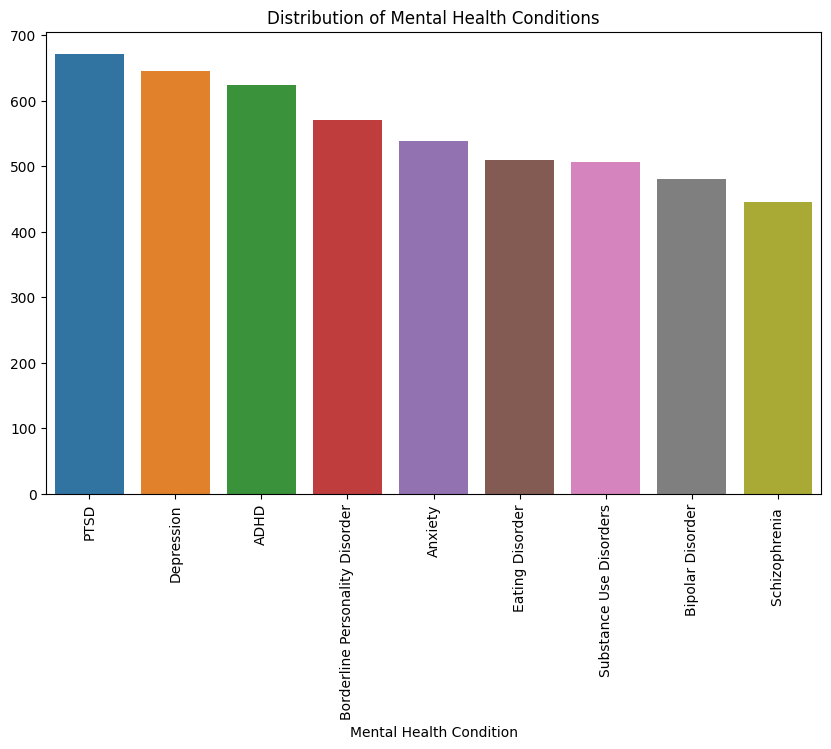

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['Mental Health Condition'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Mental Health Conditions')
plt.show()

The distribution of the target variable, which is the mental health condition, looks relatively balanced. This balance is beneficial for our analysis and modeling efforts as it allows for more robust insights and predictions across all conditions.

#### 5.3 Analyze Each Response Corresponding to Each Mental Health Condition

In this section, we will analyze the responses to each question for each mental health condition. We will visualize the frequency of responses to better understand the data distribution and identify any patterns or insights.

In [9]:
# List of questions
questions = [
    'How have you been feeling lately?',
    'Have you been sleeping well?',
    'Do you find it hard to concentrate?',
    'Have you lost interest in activities you used to enjoy?',
    'Do you feel tired or fatigued most of the time?',
    ' Do you feel nervous, anxious, or on edge frequently?',
    'Have you experienced sudden panic attacks?',
    'Do you avoid social situations or activities you used to enjoy?',
    'Have you experienced flashbacks or nightmares about a traumatic event?',
    'Do you feel detached from reality or your surroundings?'
]

# Plotting function
def plot_response_distribution(data, question):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[question], order=data[question].value_counts().index)
    plt.title(f'Response Distribution for "{question}"')
    plt.xlabel('Count')
    plt.ylabel('Response')
    plt.show()

In [12]:
# Function to print response distribution
def print_response_distribution(data, question):
    print(f'\nResponse Distribution for "{question}"')
    print(data[question].value_counts())
    print('\n')

##### 5.3.1 PTSD

Let's start with PTSD. We will visualize the responses to each question for users identified with PTSD.

In [30]:
# Filter data for PTSD
ptsd_data = df[df['Mental Health Condition'] == 'PTSD']

# # Visualize responses for PTSD
# for question in questions:
#     plot_response_distribution(ptsd_data, question)

In [ ]:
# for question in questions:
#     print_response_distribution(ptsd_data, question)

##### PTSD (Post-Traumatic Stress Disorder)
**Key Symptoms**:
- **Anxiety and Hyperarousal**: A significant number of respondents feel on edge and anxious most of the time (289 respondents).
- **Sleep Disturbances**: Many have trouble sleeping due to nightmares (285 respondents).
- **Concentration Issues**: Difficulty in concentrating is common (284 respondents).
- **Anhedonia**: Loss of interest in activities once enjoyed (273 respondents).
- **Chronic Fatigue**: Persistent exhaustion (291 respondents).
- **Frequent Panic Attacks**: Many experience sudden panic attacks (285 respondents).
- **Social Withdrawal**: Avoidance of social situations and activities (279 respondents).
- **Flashbacks and Nightmares**: Frequent re-experiencing of traumatic events (282 respondents).
- **Dissociation**: Feeling detached from reality (307 respondents).

**Conclusion**:
Respondents with PTSD commonly experience high levels of anxiety, frequent nightmares, difficulty concentrating, chronic fatigue, and social withdrawal. The presence of flashbacks and dissociation highlights the intense re-experiencing of traumatic events.

##### 5.3.2 Depression

Next, we will analyze the responses for users identified with Depression.

In [ ]:
# Filter data for Depression
depression_data = df[df['Mental Health Condition'] == 'Depression']

# Visualize responses for Depression
for question in questions:
    plot_response_distribution(depression_data, question)

In [ ]:
# for question in questions:
#     print_response_distribution(depression_data, question)

##### Depression
**Key Symptoms**:
- **Persistent Sadness**: Feeling really down and empty is the most common response (247 respondents).
- **Sleep Issues**: Trouble sleeping, including difficulty falling asleep or waking up frequently (243 respondents).
- **Concentration Difficulties**: Hard to concentrate, often described as "brain fog" (250 respondents).
- **Anhedonia**: Loss of interest in previously enjoyed activities (272 respondents).
- **Chronic Fatigue**: Feeling exhausted all the time (242 respondents).
- **Feelings of Hopelessness**: Dominant feelings of sadness and hopelessness (258 respondents).
- **Less Frequent Panic Attacks**: Panic attacks are less common (255 respondents).
- **Social Withdrawal**: Avoidance of social situations and activities (251 respondents).
- **Emotional Numbness**: Many feel detached from reality (249 respondents).

**Conclusion**:
Depression is characterized by persistent sadness, sleep disturbances, concentration difficulties, chronic fatigue, and social withdrawal. Feelings of hopelessness and emotional numbness are prevalent, with panic attacks being less common compared to other conditions.

##### 5.3.3 ADHD

Now, let's visualize the responses for users identified with ADHD.

In [ ]:
# Filter data for ADHD
adhd_data = df[df['Mental Health Condition'] == 'ADHD']

# Visualize responses for ADHD
for question in questions:
    plot_response_distribution(adhd_data, question)

In [ ]:
# for question in questions:
#     print_response_distribution(adhd_data, question)

##### ADHD (Attention-Deficit/Hyperactivity Disorder)
**Key Symptoms**:
- **Struggling with Focus**: Difficulty staying focused is a core symptom (270 respondents).
- **Sleep Issues**: Trouble falling asleep and staying asleep is common (266 respondents).
- **Concentration Difficulties**: Hard to concentrate on tasks requiring significant focus (265 respondents).
- **Fluctuating Interest in Activities**: Quick loss of interest in activities (287 respondents).
- **Chronic Fatigue**: Feeling exhausted even with little physical activity (276 respondents).
- **Restlessness**: Many feel restless rather than anxious (295 respondents).
- **Fewer Panic Attacks**: Panic attacks are less frequent (272 respondents).
- **Social Situations**: Enjoy being around people but get overwhelmed (270 respondents).
- **Less Frequent Flashbacks and Nightmares**: These symptoms are rare (268 respondents).
- **Grounded but Distracted**: Often get lost in their thoughts (291 respondents).

**Conclusion**:
ADHD involves significant difficulties with focus, sleep issues, quick loss of interest in activities, and restlessness. Panic attacks and flashbacks are less frequent, and respondents often feel grounded but distracted.

##### 5.3.4 Borderline Personality Disorder
We will now analyze the responses for users identified with Borderline Personality Disorder.

In [ ]:
# Filter data for Borderline Personality Disorder
bpd_data = df[df['Mental Health Condition'] == 'Borderline Personality Disorder']

# Visualize responses for Borderline Personality Disorder
for question in questions:
    plot_response_distribution(bpd_data, question)

In [ ]:
# for question in questions:
#     print_response_distribution(bpd_data, question)

##### Borderline Personality Disorder (BPD)
**Key Symptoms**:
- **Emotional Instability**: Emotions are intense and unstable (122 respondents).
- **Sleep Disturbances**: Trouble sleeping due to racing thoughts and worries (94 respondents).
- **Concentration Difficulties**: Hard to concentrate due to intense emotions (121 respondents).
- **Fluctuating Interest in Activities**: Sudden loss of interest in activities (96 respondents).
- **Chronic Fatigue**: Exhaustion from emotional ups and downs (108 respondents).
- **Frequent Anxiety**: High levels of anxiety, especially in social situations (110 respondents).
- **Panic Attacks**: Sudden episodes of intense fear or panic (101 respondents).
- **Social Withdrawal**: Avoidance of social situations due to fear of rejection (106 respondents).
- **Frequent Flashbacks**: Intense emotional reactions to past traumas (101 respondents).
- **Dissociation**: Feeling detached from reality, like watching oneself from outside (100 respondents).

**Conclusion**:
BPD is marked by emotional instability, frequent anxiety, sleep disturbances, concentration difficulties, and chronic fatigue. Social withdrawal and dissociation are common, reflecting the intense emotional experiences of individuals with BPD.

##### 5.3.5 Anxiety
Next, we will visualize the responses for users identified with Anxiety.

In [ ]:
# Filter data for Anxiety
anxiety_data = df[df['Mental Health Condition'] == 'Anxiety']

# Visualize responses for Anxiety
for question in questions:
    plot_response_distribution(anxiety_data, question)

In [ ]:
# for question in questions:
#     print_response_distribution(anxiety_data, question)

##### Anxiety
**Key Symptoms**:
- **High Anxiety**: Feeling really anxious and on edge is predominant (183 respondents).
- **Sleep Disturbances**: Trouble falling asleep and staying asleep is common (202 respondents).
- **Concentration Difficulties**: Hard to concentrate due to racing worries (176 respondents).
- **Loss of Interest in Activities**: Common loss of interest in activities (181 respondents).
- **Chronic Fatigue**: Persistent exhaustion (211 respondents).
- **Frequent Panic Attacks**: Panic attacks are common (198 respondents).
- **Social Avoidance**: Avoidance of social gatherings due to fear of panic attacks (213 respondents).
- **Nightmares and Intrusive Thoughts**: Frequent nightmares and intrusive thoughts about anxiety triggers (193 respondents).
- **Dissociation**: Feeling detached from reality, like being in a fog (215 respondents).

**Conclusion**:
Anxiety disorders involve high levels of anxiety, sleep disturbances, concentration difficulties, and frequent panic attacks. Social avoidance, nightmares, and dissociation are also common, reflecting the pervasive impact of anxiety on daily life.

##### 5.3.6 Eating Disorder
Let's analyze the responses for users identified with Eating Disorder.

In [ ]:
# Filter data for Eating Disorder
eating_disorder_data = df[df['Mental Health Condition'] == 'Eating Disorder']

# Visualize responses for Eating Disorder
for question in questions:
    plot_response_distribution(eating_disorder_data, question)

In [ ]:
# for question in questions:
#     print_response_distribution(eating_disorder_data, question)

##### Eating Disorder
**Key Symptoms**:
- **Anxiety About Weight**: Preoccupation with weight and appearance (228 respondents).
- **Sleep Disturbances**: Trouble sleeping due to worries about food and calories (209 respondents).
- **Concentration Difficulties**: Hard to focus due to constant thoughts about food and body (239 respondents).
- **Loss of Interest in Activities**: Affected by preoccupation with food and weight (205 respondents).
- **Chronic Fatigue**: Fatigue from restricting food or overexercising (194 respondents).
- **Frequent Anxiety**: Constant worry about eating and its effects on weight (217 respondents).
- **Panic Attacks**: Panic attacks related to food intake or exercise (218 respondents).
- **Social Avoidance**: Avoidance of social events involving food or activities conflicting with eating/exercise routines (218 respondents).
- **Intrusive Thoughts**: Frequent intrusive thoughts about food and body image (223 respondents).
- **Dissociation**: Feeling not present during binges or purges (217 respondents).

**Conclusion**:
Eating disorders involve significant anxiety about weight, sleep disturbances, concentration difficulties, and chronic fatigue. Frequent anxiety, panic attacks, social avoidance, and intrusive thoughts about food and body image are common, along with feelings of dissociation.

##### 5.3.7 Substance Use Disorders
We will now visualize the responses for users identified with Substance Use Disorders.

In [ ]:
# Filter data for Substance Use Disorders
substance_use_disorders_data = df[df['Mental Health Condition'] == 'Substance Use Disorders']

# Visualize responses for Substance Use Disorders
for question in questions:
    plot_response_distribution(substance_use_disorders_data, question)

In [ ]:
# for question in questions:
#     print_response_distribution(substance_use_disorders_data, question)

##### Substance Use Disorders
**Key Symptoms**:
- **Feeling Down and Unmotivated**: Common feeling of being really down and empty (99 respondents).
- **Sleep Disturbances**: Trouble sleeping is prevalent (115 respondents).
- **Concentration Difficulties**: Hard to concentrate due to emotional distraction (113 respondents).
- **Loss of Interest in Activities**: Frequent loss of interest in activities (110 respondents).
- **Chronic Fatigue**: Persistent exhaustion (115 respondents).
- **Frequent Anxiety**: High levels of anxiety, especially in social situations (115 respondents).
- **Panic Attacks**: Many experience panic attacks (101 respondents).
- **Social Avoidance**: Avoidance of social situations due to fear of being noticed (101 respondents).
- **Intrusive Thoughts**: Frequent intrusive thoughts (113 respondents).
- **Dissociation**: Feeling detached from reality and surroundings (101 respondents).

**Conclusion**:
Substance use disorders involve feeling down and unmotivated, sleep disturbances, concentration difficulties, chronic fatigue, and frequent anxiety. Panic attacks, social avoidance, intrusive thoughts, and dissociation are also common, reflecting the complex impact of substance use on mental health.

##### 5.3.8 Bipolar Disorder
Next, let's analyze the responses for users identified with Bipolar Disorder.

In [ ]:
# Filter data for Bipolar Disorder
bipolar_disorder_data = df[df['Mental Health Condition'] == 'Bipolar Disorder']

# Visualize responses for Bipolar Disorder
for question in questions:
    plot_response_distribution(bipolar_disorder_data, question)

In [ ]:
# for question in questions:
#     print_response_distribution(bipolar_disorder_data, question)

##### Bipolar Disorder

**Key Symptoms**:
- **Mood Swings**: Alternating periods of high energy and depression (e.g., "feeling really high and full of energy" - 88 respondents, "feeling really low and depressed" - 43 respondents).
- **Sleep Disturbances**: Issues with sleep during high and low periods (e.g., "sleeping very little during high periods" - 71 respondents, "trouble sleeping" - 74 respondents).
- **Concentration Difficulties**: Variability in concentration levels (e.g., "hard to focus on anything" - 72 respondents, "mind feels all over the place" - 66 respondents).
- **Interest in Activities**: Fluctuating interest based on mood swings (e.g., "no interest during low periods" - 67 respondents, "lose interest suddenly" - 55 respondents).
- **Chronic Fatigue**: Fatigue related to mood swings (e.g., "exhausted all the time" - 74 respondents, "energy in high periods, fatigue in low periods" - 74 respondents).
- **Frequent Anxiety**: Anxiety varying with mood (e.g., "always on edge" - 50 respondents, "anxious in social situations" - 48 respondents).
- **Panic Attacks**: Panic attacks can be common (e.g., "panic attacks out of nowhere" - 55 respondents).
- **Social Withdrawal**: Varies with mood (e.g., "avoiding social gatherings during low periods" - 62 respondents, "engaging in risky behaviors during high periods" - 62 respondents).
- **Flashbacks and Nightmares**: Less common, but present (e.g., "no flashbacks or nightmares" - 90 respondents, "flashbacks and nightmares" - 70 respondents).
- **Dissociation**: Feelings of detachment during different periods (e.g., "detached during high periods, bleak during low periods" - 87 respondents).

**Conclusion**:
Bipolar Disorder is characterized by significant mood swings, alternating between high energy and depressive states. Sleep disturbances, concentration difficulties, fluctuating interest in activities, and chronic fatigue are common. Anxiety, panic attacks, social withdrawal, and dissociation vary with mood states.

##### 5.3.9 Schizophrenia
Finally, we will visualize the responses for users identified with Schizophrenia.

In [ ]:
# Filter data for Schizophrenia
schizophrenia_data = df[df['Mental Health Condition'] == 'Schizophrenia ']

# Visualize responses for Schizophrenia
for question in questions:
    plot_response_distribution(schizophrenia_data, question)

In [ ]:
for question in questions:
    print_response_distribution(schizophrenia_data, question)

##### Schizophrenia
**Key Symptoms**:
- **Emotional Instability**: Intense and unstable emotions (e.g., "emotions all over the place" - 73 respondents).
- **Sleep Disturbances**: Issues with sleep, often due to hallucinations (e.g., "disturbed sleep because of voices" - 53 respondents).
- **Concentration Difficulties**: Distraction by hallucinations (e.g., "hard to concentrate when voices are distracting" - 70 respondents).
- **Interest in Activities**: Loss of interest due to preoccupation with hallucinations (e.g., "no interest in activities" - 59 respondents).
- **Chronic Fatigue**: Fatigue related to mental strain (e.g., "tired from mental strain" - 56 respondents).
- **Frequent Anxiety**: Anxiety about hallucinations and social situations (e.g., "always worried about voices" - 61 respondents).
- **Panic Attacks**: Panic attacks related to hallucinations (e.g., "episodes of feeling overwhelmed by voices" - 60 respondents).
- **Social Withdrawal**: Avoidance of social situations due to fear of hallucinations (e.g., "avoiding social events" - 57 respondents).
- **Flashbacks and Nightmares**: Flashbacks related to hallucinations (e.g., "hallucinations that feel like nightmares" - 59 respondents).
- **Dissociation**: Feelings of detachment from reality (e.g., "living in a different reality" - 62 respondents).

**Conclusion**:
Schizophrenia involves intense emotional instability, sleep disturbances due to hallucinations, concentration difficulties, and chronic fatigue. Anxiety, panic attacks, social withdrawal, and dissociation are also common, often related to the presence of hallucinations and delusions.

#### 5.4 Hypothesis on the `User_ID` Column

**Potential Grouping or Classification**

Given that there are only 9 unique values, the `User_ID` column might represent different groups or categories within the survey:

- Hypothesis 1: The id could indicate different demographic groups, such as age ranges, geographical regions, or other segments.
- Hypothesis 2: The id could correspond to different survey versions or conditions under which the survey was conducted.

In [ ]:
# Calculate the frequency of each `User_ID`
id_counts = df['User_ID'].value_counts().sort_index()

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=id_counts.index, y=id_counts.values)
plt.title('Frequency Distribution of `id` Column')
plt.xlabel('ID')
plt.ylabel('Count')
plt.show()

In [ ]:
data = df.copy()

# Convert all categorical columns to integer using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**After conducting a thorough analysis of the `User_ID` column within our survey dataset, we arrived at the following conclusions:**

1. Correlation Analysis

Upon converting all categorical data to numerical values and calculating the correlation matrix, it was observed that the correlation between the `User_ID` column and other features is significantly low. This indicates that `User_ID` does not have a strong linear relationship with any other single feature in the dataset.

2. Interpretation of `User_ID`

Although the exact purpose of the `User_ID` column remains unclear from the correlation analysis alone, we cannot arbitrarily decide what `User_ID` represents. The limited number of unique values (1-9) suggests that `User_ID` might be representing a specific grouping or classification within the survey data, but further domain knowledge or metadata would be required to confirm its exact role.

---
3. Decision on Retaining `User_ID`

Given the potential significance of the `User_ID` column, we have decided not to drop it from our dataset. Despite its low correlation with other features, `User_ID` might still provide valuable information that could help our model understand underlying patterns or groupings in the data. Retaining `User_ID` ensures that we do not inadvertently discard any useful information that could contribute to our analysis or modeling efforts.


---
After understanding the data, the following section focuses on data preparation and modeling steps.


#### 5.5 Scoring per Responses

This is a bit of feature engineering that capture the data pattern in every type of responses

#### 5.5.1 PTSD

In [10]:
ptsd_data = df[df['Mental Health Condition'] == 'PTSD']
dict_ptsd = []

for question in questions:
    jml_ptsd = (df[df['Mental Health Condition'] == 'PTSD'].shape[0])
    response_counts_ptsd = ptsd_data[question].value_counts()
    response_distribution = {response: count / jml_ptsd for response, count in response_counts_ptsd.items()}
    dict_ptsd.append(response_distribution)

#### 5.5.2 Depression

In [11]:
depression_data = df[df['Mental Health Condition'] == 'Depression']
dict_depression = []

for question in questions:
    jml_depression = (df[df['Mental Health Condition'] == 'Depression'].shape[0])
    response_counts_depression = depression_data[question].value_counts()
    response_distribution = {response: count / jml_depression for response, count in response_counts_depression.items()}
    dict_depression.append(response_distribution)

#### 5.5.3 ADHD

In [12]:

adhd_data = df[df['Mental Health Condition'] == 'ADHD']
dict_adhd = []

for question in questions:
    jml_adhd = (df[df['Mental Health Condition'] == 'ADHD'].shape[0])
    response_counts_adhd = adhd_data[question].value_counts()
    response_distribution = {response: count / jml_adhd for response, count in response_counts_adhd.items()}
    dict_adhd.append(response_distribution)

#### 5.5.4 Borderline Personality Disorder

In [13]:
bpd_data = df[df['Mental Health Condition'] == 'Borderline Personality Disorder']
dict_bpd = []

for question in questions:
    jml_bpd = (df[df['Mental Health Condition'] == 'Borderline Personality Disorder'].shape[0])
    response_counts_bpd = bpd_data[question].value_counts()
    response_distribution = {response: count / jml_bpd for response, count in response_counts_bpd.items()}
    dict_bpd.append(response_distribution)

#### 5.5.5 Anxiety

In [14]:
anxiety_data = df[df['Mental Health Condition'] == 'Anxiety']
dict_anxiety = []

for question in questions:
    jml_anxiety = (df[df['Mental Health Condition'] == 'Anxiety'].shape[0])
    response_counts_anxiety = anxiety_data[question].value_counts()
    response_distribution = {response: count / jml_anxiety for response, count in response_counts_anxiety.items()}
    dict_anxiety.append(response_distribution)

#### 5.5.6 Eating Disorder

In [15]:
ed_data = df[df['Mental Health Condition'] == 'Eating Disorder']
dict_ed = []

for question in questions:
    jml_ed = (df[df['Mental Health Condition'] == 'Eating Disorder'].shape[0])
    response_counts_ed = ed_data[question].value_counts()
    response_distribution = {response: count / jml_ed for response, count in response_counts_ed.items()}
    dict_ed.append(response_distribution)

#### 5.5.7 Substance Use Disorders

In [16]:
sud_data = df[df['Mental Health Condition'] == 'Substance Use Disorders']
dict_sud = []

for question in questions:
    jml_sud = (df[df['Mental Health Condition'] == 'Substance Use Disorders'].shape[0])
    response_counts_sud = sud_data[question].value_counts()
    response_distribution = {response: count / jml_sud for response, count in response_counts_sud.items()}
    dict_sud.append(response_distribution)

#### 5.5.8 Bipolar Disorder

In [17]:
bd_data = df[df['Mental Health Condition'] == 'Bipolar Disorder']
dict_bd = []

for question in questions:
    jml_bd = (df[df['Mental Health Condition'] == 'Bipolar Disorder'].shape[0])
    response_counts_bd = bd_data[question].value_counts()
    response_distribution = {response: count / jml_bd for response, count in response_counts_bd.items()}
    dict_bd.append(response_distribution)

#### 5.5.9 Scizophrenia

In [35]:
skizo_data = df[df['Mental Health Condition'] == 'Schizophrenia ']
dict_skizo = []

for question in questions:
    jml_skizo = (df[df['Mental Health Condition'] == 'Schizophrenia '].shape[0])
    response_counts_skizo = skizo_data[question].value_counts()
    response_distribution = {response: count / jml_skizo for response, count in response_counts_skizo.items()}
    dict_skizo.append(response_distribution)

In [28]:
df['ptsd_score'] = sum(df[question].map(dict_ptsd[i]) for i, question in enumerate(questions))
df['depression_score'] = sum(df[question].map(dict_depression[i]) for i, question in enumerate(questions))
df['adhd_score'] = sum(df[question].map(dict_adhd[i]) for i, question in enumerate(questions))
df['bpd_score'] = sum(df[question].map(dict_bpd[i]) for i, question in enumerate(questions))
df['anxiety_score'] = sum(df[question].map(dict_anxiety[i]) for i, question in enumerate(questions))
df['ed_score'] = sum(df[question].map(dict_ed[i]) for i, question in enumerate(questions))
df['sud_score'] = sum(df[question].map(dict_sud[i]) for i, question in enumerate(questions))
df['bd_score'] = sum(df[question].map(dict_bd[i]) for i, question in enumerate(questions))
df['skizo_score'] = sum(df[question].map(dict_skizo[i]) for i, question in enumerate(questions))

## 6. Modeling

### 6.1 Encoding Categorical Variables

To prepare the dataset for modeling, we need to encode all categorical variables into integers. This will allow the model to process these features effectively. Additionally, we will keep track of the encoding mappings for each categorical column to facilitate easier analysis and interpretation of the model later.


---
After understanding the data, the following section focuses on data preparation and modeling steps.


In [ ]:
# Dictionary to store the label encoders for each column
label_encoders = {}
encoding_mappings = {}

data = df.copy()

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    encoding_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the encoding mappings for each column
for column, mapping in encoding_mappings.items():
    print(f'Encoding mapping for column {column}:')
    for original_value, encoded_value in mapping.items():
        print(f'{original_value} -> {encoded_value}')
    print()

### 6.2 Data Splitting

First, we will split the dataset (4992 records) into three parts: 
- 60% for training
- 20% for testing
- 20% for prediction

Since our target variable has only 9 unique labels, we will ensure that the split is stratified to maintain the label distribution across the splits.

---
After understanding the data, the following section focuses on data preparation and modeling steps.


In [ ]:
df = df.drop(['User_ID'], axis=1)

In [ ]:
# data.columns.tolist()

In [ ]:
# Define features and target
X = data.drop('Mental Health Condition', axis=1)
y = data['Mental Health Condition']

# Split the data into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.10, stratify=y, random_state=69)

# Split the temporary set into testing (20%) and prediction (20%) sets
X_test, X_pred, y_test, y_pred = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=69)

# Verify the split sizes
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')
print(f'Prediction set size: {X_pred.shape[0]}')

### 6.3 Model Training with CatBoostClassifier

We will use `CatBoostClassifier`, a high-performance gradient boosting library, and fine-tune it using `Optuna` for hyperparameter optimization. Additionally, we will integrate `MLflow` to track the progress of the tuning process and the final model.

---
With the model defined, we proceed to training and evaluation.


In [ ]:
# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to tune
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10)
    }
    
    # Initialize CatBoostClassifier
    model = CatBoostClassifier(**params, verbose=0)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_test = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_test)
    
    return accuracy

# Initialize MLflow
mlflow.start_run(run_name='catboost_optuna')

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Log the best trial's hyperparameters
mlflow.log_params(study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params
final_model = CatBoostClassifier(**best_params, verbose=0)
final_model.fit(X_train, y_train)

# Log the final model
mlflow.sklearn.log_model(final_model, 'catboost_model')

# End the MLflow run
mlflow.end_run()

# Print the best trial's accuracy
print(f'Best trial accuracy: {study.best_trial.value}')

In [ ]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('corpora/wordnet')
nltk.download('punkt')

In [ ]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
!pip install textblob

In [ ]:
!python -m textblob.download_corpora

In [ ]:
df['combined_text'] = df.apply(lambda row: ' '.join([str(row[col]) for col in df.columns if col not in ['Mental Health Condition']]), axis=1)

def strip_all_entities(text):
    text = re.sub(r'\r|\n', ' ', text.lower())  # Replace newline and carriage return with space, and convert to lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)  # Remove links and mentions
    text = re.sub(r'[^\x00-\x7f]', '', text)  # Remove non-ASCII characters
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Lemmatize words
def lemmatize(text):
    words = word_tokenize(text)
#     lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words) #lemmatized_words

df['cleaned_text'] = df['combined_text'].apply(clean_text)

In [ ]:
df

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['Mental Health Condition'], test_size=0.2, random_state=42)

# Vectorization
    vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train CatBoost classifier
model = CatBoostClassifier(verbose=False)
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

In [ ]:
---- Experiment ----

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to tune
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10)
    }
    
    # Initialize CatBoostClassifier
    model = CatBoostClassifier(**params, verbose=False)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_test = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_test)
    
    return accuracy

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best trial's hyperparameters
best_params = study.best_trial.params

# Train the final model with the best hyperparameters
final_model = CatBoostClassifier(**best_params, verbose=False)
final_model.fit(X_train, y_train)

# Predict on the prediction set
y_pred_final = final_model.predict(X_pred)

# Calculate and print the accuracy
final_accuracy = accuracy_score(y_pred, y_pred_final)
print(f'Final model accuracy on the prediction set: {final_accuracy}')

In [ ]:
!pip install autogluon

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
pip install autogluon.tabular

In [ ]:
from autogluon.tabular import TabularPredictor

# Combine features and target for AutoGluon
train_data = X_train.copy()
train_data['target_column'] = y_train

test_data = X_test.copy()
test_data['target_column'] = y_test

# Initialize and train the AutoGluon predictor
predictor = TabularPredictor(label='target_column').fit(train_data, presets='best_quality')

# Evaluate the predictor on the test set
test_performance = predictor.evaluate(test_data)

# Make predictions on the prediction set
predictions = predictor.predict(X_pred)

# Print the evaluation metrics
print(f'Test performance: {test_performance}')

# Optionally, save the predictor for future use
predictor.save('autogluon_predictor')

## Conclusions